## Wine Quality Dataset

The dataset used refers to the quality of red wine. It is comprissed of 12 numeric (real) features:
1. Fixed acidity
2. Volatile acidity
3. Citric acidity
4. Residual Sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

The label is the quality of the wine, an integer number ranging from 0 to 10.

In [72]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from sklearn.decomposition import PCA
import numpy as np
from numpy import linalg as LA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Data pre-processing

In [2]:
df = pd.read_csv("winequality-red.csv",header = 0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### Check how many different classes are there.

In [3]:
print(df.describe())
print(df.quality.unique())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

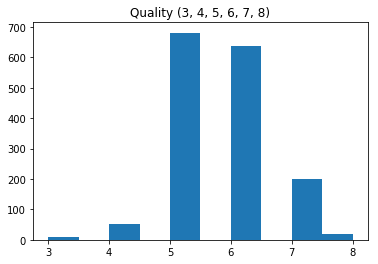

In [4]:
a=df['quality']
plt.hist(a)
plt.title('Quality (3, 4, 5, 6, 7, 8)')
plt.show()

###### The dataset is clearly unbalanced. We will consider any value below 5, to be equal to 5. Analogously, any value above 6 will be set to 6

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


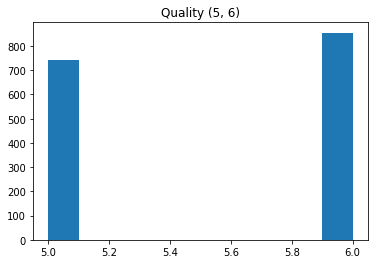

Number of rows with label 5:  744
Number of rows with label 6:  855


In [5]:
label_6 = 0
label_5 = 0
size = len(df['quality'])
for i in range(0,size):
    if(df['quality'][i]<=5):
        df['quality'][i] = 5
        label_5+=1
    else:
        df['quality'][i] = 6
        label_6+=1

a = df['quality']
plt.hist(a)        
plt.title('Quality (5, 6)')
plt.show()
print('Number of rows with label 5: ',label_5)
print('Number of rows with label 6: ',label_6)

###### Check if there any missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Separate features from label

In [7]:
label = df['quality']
#print(label)
features = df.drop('quality', 1)
#print(features)

#### Principal Component Analysis

In [8]:
X = features.values # numpy array version of the data
#print(X)
print(X.shape)
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X)
print('singular values ', pca.singular_values_)
print('normalized cumulative sum of eigenvalues \n', pca.explained_variance_ratio_)

(1599, 11)
singular values  [1.34604001e+03 3.04270910e+02 7.03980188e+01 5.39205496e+01
 4.08907312e+01 8.13338635e+00 6.08784585e+00 4.25812831e+00
 4.01305602e+00 1.52482330e+00 2.99541200e-02]
normalized cumulative sum of eigenvalues 
 [9.46576976e-01 4.83683046e-02 2.58917183e-03 1.51896798e-03
 8.73553990e-04 3.45607218e-05 1.93627614e-05 9.47278079e-06
 8.41376628e-06 1.21472798e-06 4.68762788e-10]


In [9]:
variance_ratio = pca.explained_variance_ratio_

sum_ratios = sum(variance_ratio)
sum_singularValues = sum(pca.singular_values_)

for i in pca.singular_values_:
    ratio = i / sum_singularValues
    print(ratio)

print(sum_singularValues)
print(sum_ratios)

0.7317155110470211
0.1654035114570659
0.03826878988903281
0.029311537746128578
0.022228449411410795
0.0044213581394347895
0.0033093899205821663
0.0023147443711498492
0.0021815215874068997
0.0008289031895255733
1.6283241241330565e-05
1839.5674124570503
0.9999999999999997


As we can see listes above, we can project the data into two components in order to attaing 90% of the variance. We will considere the data projected on these two components from now onwards.

In [29]:
## Repeating to 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
## Reconstruction
X1=pca.inverse_transform(X_pca)
a=X-X1
print('The squared error', LA.norm(a))

The squared error 98.36226267762937


#### Plot the data on the two components

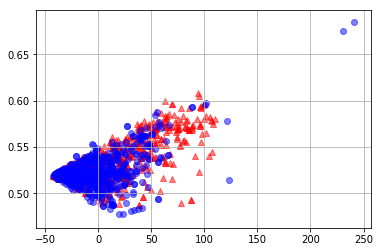

In [48]:
y = label.values
plt.scatter(X_pca[y==5, 0], X1[y==5, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y == 6, 0], X1[y == 6, 1], color='blue', marker='o', alpha=0.5)
plt.grid()

## Learning Models

On the red wine dataset the following learning models will be applied:
1. Neural Network
2. Random Forests

### Neural Network

In [76]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_pca,y)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
prediction = mlp.predict(X_pca)

In [78]:
diff = 0
for i in range(0, len(prediction)):
    if prediction[i]!=y[i]:
        diff+=1
accuracy = 1-diff/len(prediction)
print("Number of misclassified examples: ", diff)
print("Accuracy is: ",accuracy)

confusion_matrix(y, prediction)

Number of misclassified examples:  597
Accuracy is:  0.626641651031895


array([[331, 413],
       [184, 671]], dtype=int64)

### Random Forest